In [89]:
import os
import numpy as np
import glob
from matplotlib_surface_plotting import plot_surf
from gene_viz.utils import get_data_path, load_mesh_geometry

In [ ]:
# concatenate meshes

def concatenate_meshes(mesh_files, f_explode, overlays=None):
    vertices = []
    faces = []
    overlay = []
    for i, mesh_file in enumerate(mesh_files): 
        # load the mesh
        mesh = load_mesh_geometry(mesh_file)
        if i==0:
            # add the vertices and faces of the first mesh
            vertices = mesh['coords'] + (mesh['coords'].mean(axis=0)) * f_explode
            faces = mesh['faces']
            if overlays is None:
                overlay = np.ones(len(mesh['coords']))*1
            else: 
                overlay = overlays[i]
        else:
            # add the vertices and faces of the other meshes
            faces = np.vstack([faces, mesh['faces']+len(vertices)])
            vertices = np.vstack([vertices,  mesh['coords']+ (mesh['coords'].mean(axis=0)) * f_explode])
            if overlays is None:
                overlay = np.hstack([overlay, np.ones(len(mesh['coords']))*(i+2)])
            else: 
                overlay = np.hstack([overlay, overlays[i]])
    return vertices, faces, overlay

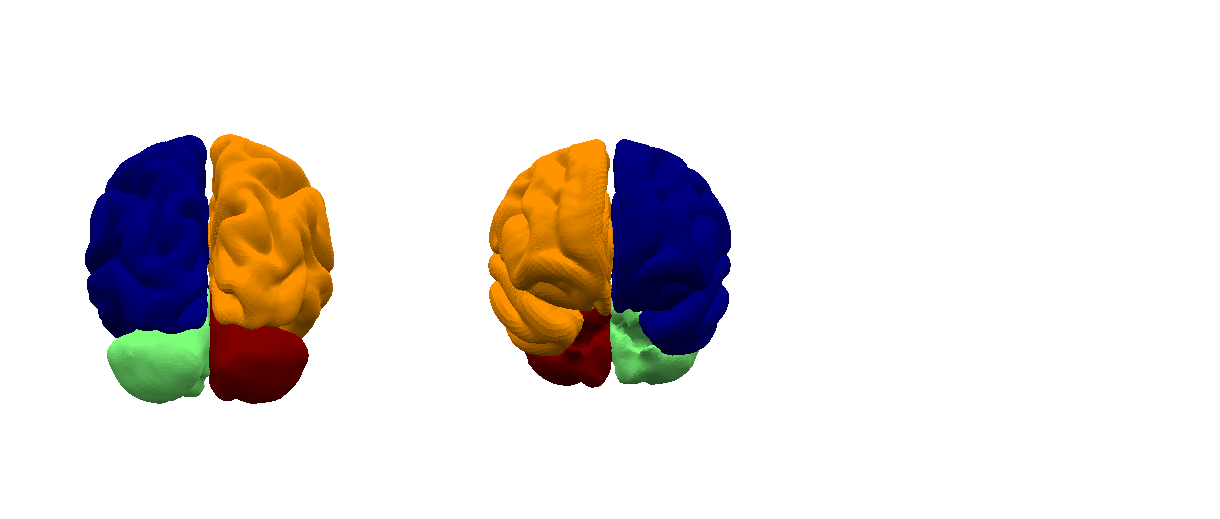

In [164]:
# get cortex and cerebellum meshes
mesh_files = [os.path.join(get_data_path(),'fs_LR.32k.L.pial.surf.gii'),
              os.path.join(get_data_path(),'Left-Cerebellum-Cortex_meshfile.surf.gii'),
              os.path.join(get_data_path(),'fs_LR.32k.R.pial.surf.gii'),
              os.path.join(get_data_path(),'Right-Cerebellum-Cortex_meshfile.surf.gii')
              ]

# define the explode fraction 
f_explode = 0

# plot 
vertices, faces, overlay = concatenate_meshes(mesh_files, f_explode, overlays=None)

plot_surf(vertices, faces, overlay,
          rotate=[0, 180],
          x_rotate = 280,
          cmap = 'jet',
          colorbar = False,
           )

/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:9: RuntimeWarning: invalid value encountered in divide
  arr[:,0] /= lens
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:10: RuntimeWarning: invalid value encountered in divide
  arr[:,1] /= lens
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:11: RuntimeWarning: invalid value encountered in divide
  arr[:,2] /= lens


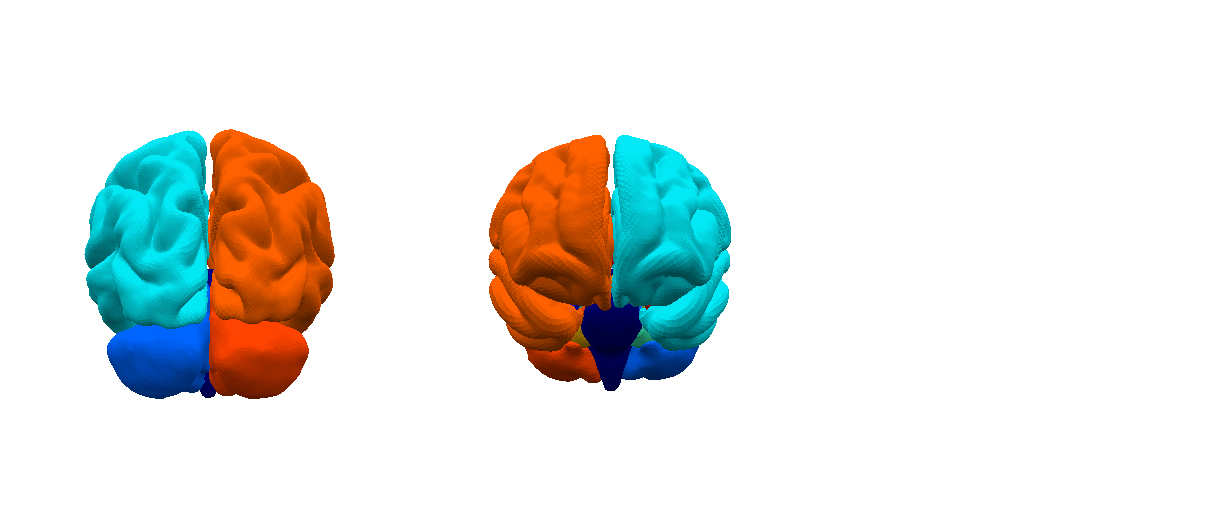

In [165]:

# get cortex and subcortical meshes
mesh_files = glob.glob(os.path.join(get_data_path(), '*'))
mesh_files = [file for file in mesh_files if 'Left-' in file or 'Right-' in file or 'fs_LR' in file or 'Brain-Stem' in file]
mesh_files = [file for file in mesh_files if not 'Cerebral-' in file]

# define the explode fraction 
f_explode = 0

# plot 
vertices, faces, overlay = concatenate_meshes(mesh_files, f_explode, overlays=None)

plot_surf(vertices, faces, overlay,
          rotate=[0,180],
          x_rotate = 280,
          cmap = 'jet',
          colorbar = False,
           )

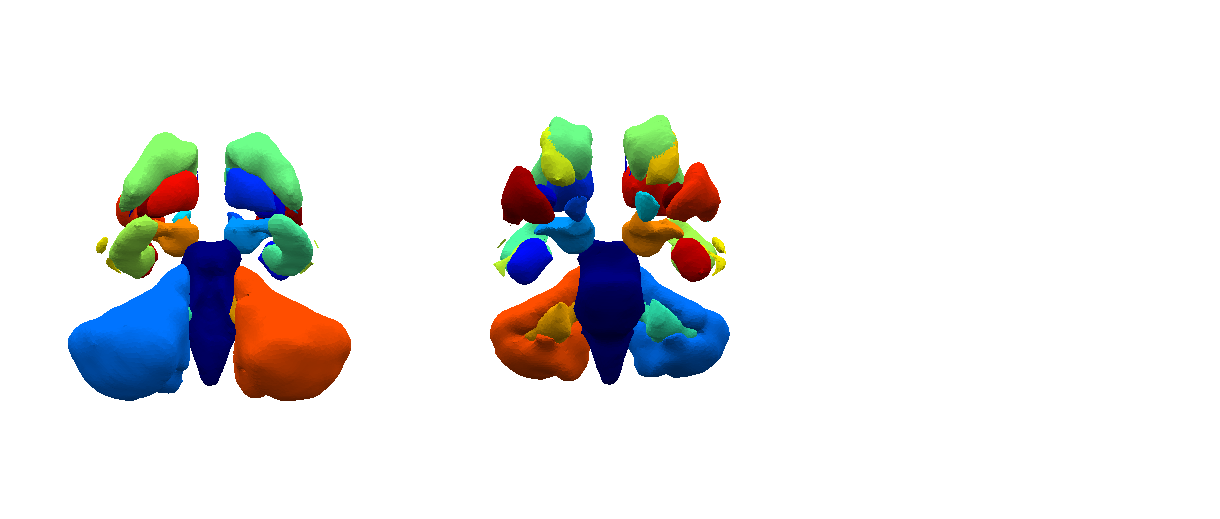

In [166]:
# get cortex and subcortical meshes
mesh_files = glob.glob(os.path.join(get_data_path(), '*'))
mesh_files = [file for file in mesh_files if 'Left-' in file or 'Right-' in file or 'Brain-Stem' in file]
mesh_files = [file for file in mesh_files if not 'Cerebral-' in file]

# define the explode fraction 
f_explode = 0.5

# plot 
vertices, faces, overlay = concatenate_meshes(mesh_files, f_explode, overlays=None)

plot_surf(vertices, faces, overlay,
          rotate=[0,180],
          x_rotate = 280,
          cmap = 'jet',
          colorbar = False,
           )

/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:9: RuntimeWarning: invalid value encountered in divide
  arr[:,0] /= lens
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:10: RuntimeWarning: invalid value encountered in divide
  arr[:,1] /= lens
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:11: RuntimeWarning: invalid value encountered in divide
  arr[:,2] /= lens


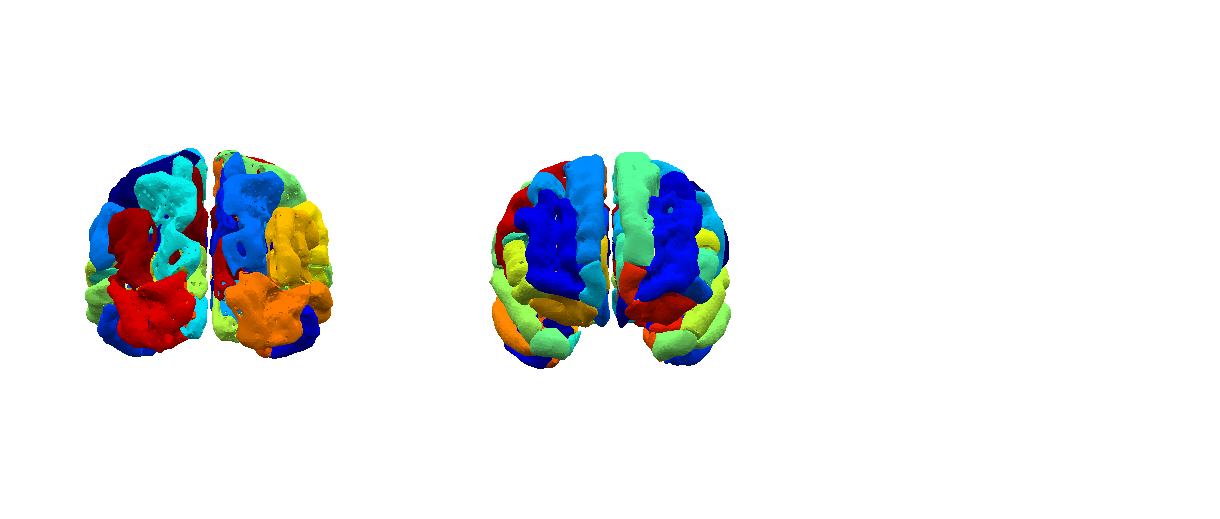

In [167]:

# get only cortex meshes
mesh_files = glob.glob(os.path.join(get_data_path(), '*'))
mesh_files = [file for file in mesh_files if 'ctx-' in file ]

# define the explode fraction 
f_explode = 0

# plot 
vertices, faces, overlay = concatenate_meshes(mesh_files, f_explode, overlays=None)

plot_surf(vertices, faces, overlay,
          rotate=[0,180],
          x_rotate = 280,
          cmap = 'jet',
          colorbar = False,
           )

/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:9: RuntimeWarning: invalid value encountered in divide
  arr[:,0] /= lens
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:10: RuntimeWarning: invalid value encountered in divide
  arr[:,1] /= lens
/Users/mathilderipart/Documents/work/250603_MIC-HACK/matplotlib_surface_plotting/matplotlib_surface_plotting/matplotlib_surface_plotting.py:11: RuntimeWarning: invalid value encountered in divide
  arr[:,2] /= lens


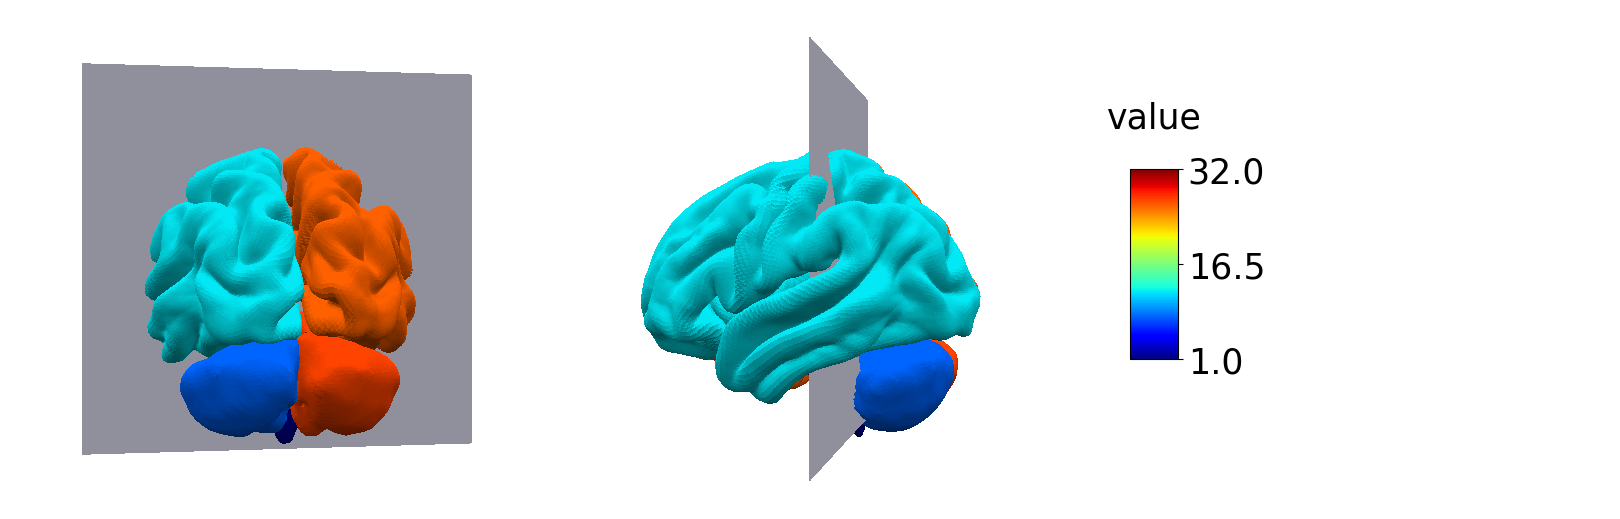

In [172]:
from gene_viz.viewer.plot_surf_and_plane import plot_surf_and_plane
import nibabel as nb

# get cortex and subcortical meshes
mesh_files = glob.glob(os.path.join(get_data_path(), '*'))
mesh_files = [file for file in mesh_files if 'Left-' in file or 'Right-' in file or 'fs_LR' in file or 'Brain-Stem' in file]
mesh_files = [file for file in mesh_files if not 'Cerebral-' in file]

f_explode = 0

vertices, faces, overlay = concatenate_meshes(mesh_files, f_explode, overlays=None)

brain_mesh={'coords':vertices,
      'faces': faces}
brain_img = nb.load('../../michack_project_data/MNI152_T1_1mm.nii.gz')

plot_surf_and_plane(mesh=brain_mesh, 
                    mesh_overlay=overlay, 
                    mri_img=brain_img, 
                    slice_i=100,
                    slice_axes=1, 
                    rotate=[10, 80],
                    cmap = 'jet'
                    )